In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#input path
data_path = "/content/drive/MyDrive/Adewale Project/Datasets/"

In [ ]:
# importing required libraries and packages to be used
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

#importing algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#importing classes and function from scikitlearn library
from sklearn.metrics import accuracy_score #used to generate performance metrics
from sklearn import metrics

from sklearn.metrics import precision_score, recall_score,f1_score

In [ ]:
path_to_save_objects= "/content/drive/MyDrive/Adewale Project/Codes/saved-models/pca_balanced"

import pickle

def save_pickle(obj_to_save, name, path_to_save_objects=path_to_save_objects):
  if path_to_save_objects.endswith("/"):
    path= path_to_save_objects + name + ".pkl"

  else:
    path= path_to_save_objects + "/" + name + ".pkl"
  
  
  pickle.dump(obj_to_save, open(path, "wb"))
  print("***", name, "saved successfully", "***")

  # return path

In [ ]:
from timeit import default_timer
import time

class Timer:
  def __init__(self, startTimer=-1, stopTimer=-1, time=-1):
    self.startTimer= -1
    self.stopTimer= -1
    self.time= -1

  def start(self):
    self.startTimer= default_timer()

  def stop(self):
    self.stopTimer= default_timer()
    self.time= self.stopTimer- self.startTimer
    output_str= "elapsed time = "+ str(self.time) + " seconds" 
    print(output_str)

  def get_time(self):
    return(self.time)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(test, pred):
  label=[0, 1]
  cm = confusion_matrix (test, pred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, cmap="winter", fmt ="d",)
  plt.xlabel('Predicted', fontsize=13)
  plt.xticks([0.5, 1.5], label)
  plt.yticks([0.5, 1.5], label)
  plt.ylabel('Truth', fontsize=13)
  plt.title('CONFUSION MATRIX');

In [ ]:
import sklearn
def perform_metrics(truth, pred):
  accuracy, precision, recall, f1_score= 0,0,0,0
  accuracy= sklearn.metrics.accuracy_score(truth, pred)
  precision= sklearn.metrics.precision_score(truth, pred)
  recall= sklearn.metrics.recall_score(truth, pred)
  f1= sklearn.metrics.f1_score(truth, pred)
  classification_report= sklearn.metrics.classification_report(truth, pred)

  print("Accuracy = ", accuracy, sep="")
  print("precision = ", precision, sep="")
  print("recall = ", recall, sep="")
  print("f1 = ", f1, sep="")

  print("\n\n\t\t\t***CLASSIFICATION REPORT***\n")
  print(classification_report)


  # return accuracy, precision, recall, f1_score

In [ ]:
# importing or loading the dataset
dataset = pd.read_csv(data_path + "dataset_small.csv")

#distributing the dataset into two components X and y
X = dataset.drop(["phishing"], axis = 1)
y = dataset["phishing"] #the target


In [ ]:
# save data used in this file
save_pickle(X, "X")
save_pickle(y, "y")

*** X saved successfully ***
*** y saved successfully ***


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
dataset.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [ ]:
dataset.tail()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
58640,1,0,0,5,0,1,0,0,0,0,...,1,2,2,563,0,0,0,0,0,1
58641,2,0,0,0,0,0,0,0,0,0,...,1,4,0,122,1,0,0,0,0,0
58642,5,6,3,6,0,2,1,1,0,0,...,1,2,1,1122,0,0,0,0,0,1
58643,2,0,0,0,0,0,0,0,0,0,...,5,2,5,299,1,1,0,0,0,0
58644,2,0,0,3,0,0,0,0,0,0,...,1,2,1,3361,1,0,0,0,0,0


In [ ]:
print(dataset.columns)

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)


In [ ]:
dataset.shape

(58645, 112)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 50.1 MB


In [ ]:
dataset.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,...,1.110666,2.829619,1.630113,5056.676272,0.501373,0.303419,0.001279,0.002234,0.008287,0.522585
std,1.473209,1.339340,0.801919,2.037525,0.138156,1.159198,0.343272,1.130323,0.107352,0.089320,...,0.912962,1.377018,1.719554,7102.853538,0.500002,0.815315,0.037599,0.047927,0.090657,0.499494
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1191.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,9866.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [ ]:
# Splitting the X and y into the
# Training set and testing 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# **Data Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Feature Extraction**

In [ ]:
# Applying PCA function on training
# and testing set of X component

from sklearn.decomposition import PCA

pca = PCA()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

# Random Forest

In [ ]:
#Fitting RF algorithm to the training set

RF_timer_train = Timer()

RF_timer_train.start()
ranClf = RandomForestClassifier()
ranClf.fit(X_train, y_train)

RF_timer_train.stop()


elapsed time = 57.037921151000035 seconds


In [ ]:
save_pickle(ranClf, "ranClf")

*** ranClf saved successfully ***


In [ ]:
# Predicting the test set result using
# predict function under RandomForest
RF_timer_test = Timer()

RF_timer_test.start()
ranPred = ranClf.predict(X_test)
ensemble_rf_ert = Timer()
ensemble_rf_ert.start()
RF_timer_test.stop()

elapsed time = 0.25976370199998655 seconds


In [ ]:
RF_timer_train.get_time()

57.037921151000035

In [ ]:
perform_metrics(y_test, ranPred)

Accuracy = 0.9447523233012192
precision = 0.9392920070478936
recall = 0.9561389205935105
f1 = 0.9476405946994182


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5596
           1       0.94      0.96      0.95      6133

    accuracy                           0.94     11729
   macro avg       0.95      0.94      0.94     11729
weighted avg       0.94      0.94      0.94     11729



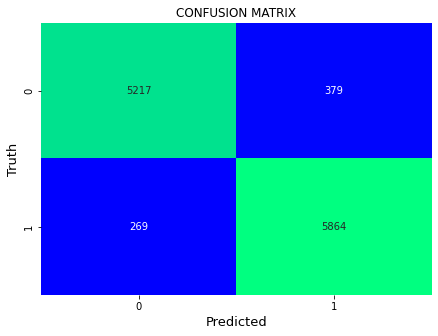

In [ ]:
plot_confusion_matrix(y_test, ranPred)

# Extremely Randomized Tree

In [ ]:
#Fitting ERT algorithm to the training set
ERT_train_timer = Timer()

ERT_train_timer.start()
ertClf = ExtraTreesClassifier()
ertClf.fit(X_train, y_train)

ERT_train_timer.stop()

elapsed time = 12.572913751999977 seconds


In [ ]:
save_pickle(ertClf, "ertClf")

*** ertClf saved successfully ***


In [ ]:
# Predicting the test set result using
# predict function under Extremely Randomized Tree

ERT_test_timer = Timer()

ERT_test_timer.start()
ertPred = ertClf.predict(X_test)

ERT_test_timer.stop()

elapsed time = 0.3750884529999894 seconds


In [ ]:
perform_metrics(y_test, ertPred)

Accuracy = 0.9437292181771677
precision = 0.9403057119871279
recall = 0.952877873797489
f1 = 0.9465500485908649


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5596
           1       0.94      0.95      0.95      6133

    accuracy                           0.94     11729
   macro avg       0.94      0.94      0.94     11729
weighted avg       0.94      0.94      0.94     11729



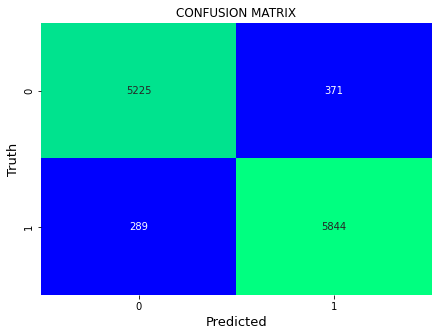

In [ ]:
plot_confusion_matrix(y_test, ertPred)

# Support Vector Machine

In [ ]:
SVM_train_timer = Timer()

SVM_train_timer.start()
svmClf = svm.SVC()
svmClf.fit(X_train, y_train)

SVM_train_timer.stop()

elapsed time = 132.592994147 seconds


In [ ]:
save_pickle(svmClf, "svmClf")

*** svmClf saved successfully ***


In [ ]:
SVM_test_timer= Timer()

SVM_test_timer.start()
svmPred = svmClf.predict(X_test)

SVM_test_timer.stop()

elapsed time = 24.41715229199997 seconds


In [ ]:
perform_metrics(y_test, svmPred)

Accuracy = 0.9136328757779862
precision = 0.9102564102564102
recall = 0.9261372900701125
f1 = 0.9181281823324982


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      5596
           1       0.91      0.93      0.92      6133

    accuracy                           0.91     11729
   macro avg       0.91      0.91      0.91     11729
weighted avg       0.91      0.91      0.91     11729



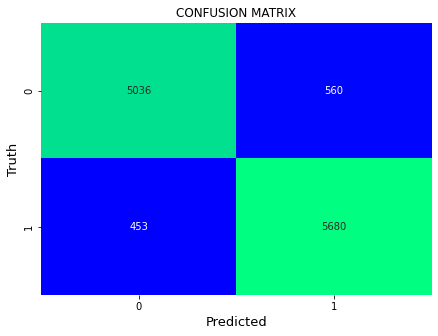

In [ ]:
plot_confusion_matrix(y_test, svmPred)

# K Nearest Neighbor

In [ ]:
KNN_train_timer = Timer()

KNN_train_timer.start()
knnClf = KNeighborsClassifier()
knnClf.fit(X_train, y_train)

KNN_train_timer.stop()

elapsed time = 0.011871046999999635 seconds


In [ ]:
save_pickle(knnClf, "knnClf")

*** knnClf saved successfully ***


In [ ]:
KNN_test_timer = Timer()

KNN_test_timer.start()
knnPred = knnClf.predict(X_test)

KNN_train_timer.stop()

elapsed time = 16.56088176100002 seconds


In [ ]:
perform_metrics(y_test, knnPred)

Accuracy = 0.9311109216471992
precision = 0.9362608553170572
recall = 0.9316810696233491
f1 = 0.9339653481529911


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5596
           1       0.94      0.93      0.93      6133

    accuracy                           0.93     11729
   macro avg       0.93      0.93      0.93     11729
weighted avg       0.93      0.93      0.93     11729



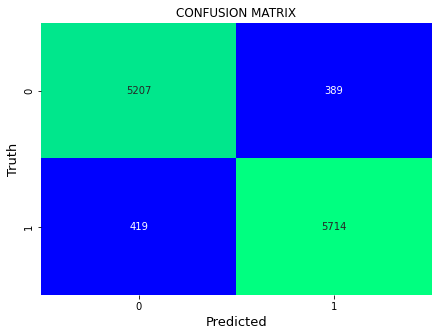

In [ ]:
plot_confusion_matrix(y_test, knnPred)

# Multilayer Perceptron

In [ ]:
MLP_train_timer = Timer()

MLP_train_timer.start()
mlpClf = MLPClassifier()
mlpClf.fit(X_train, y_train)

MLP_train_timer.stop()

elapsed time = 114.91141680099997 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
save_pickle(mlpClf, "mlpClf")

*** mlpClf saved successfully ***


In [ ]:
MLP_test_timer = Timer()

MLP_test_timer.start()
mlpPred = mlpClf.predict(X_test)

MLP_test_timer.stop()

elapsed time = 0.038272499999948195 seconds


In [ ]:
perform_metrics(y_test, mlpPred)

Accuracy = 0.9447523233012192
precision = 0.9501066797964878
recall = 0.9439099951084298
f1 = 0.9469982005561918


			***CLASSIFICATION REPORT***

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5596
           1       0.95      0.94      0.95      6133

    accuracy                           0.94     11729
   macro avg       0.94      0.94      0.94     11729
weighted avg       0.94      0.94      0.94     11729



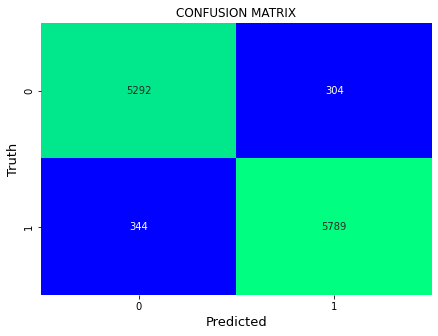

In [ ]:
plot_confusion_matrix(y_test, mlpPred)